Initial Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Checking for nulls:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Shape after cleaning: (200, 5)


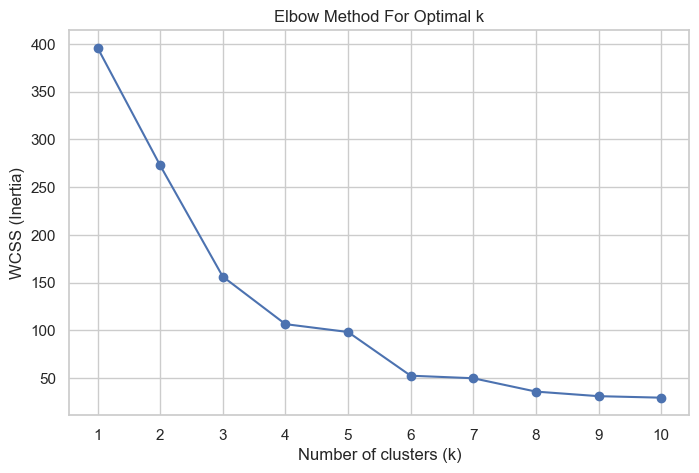


Silhouette Score for k=5: 0.4366


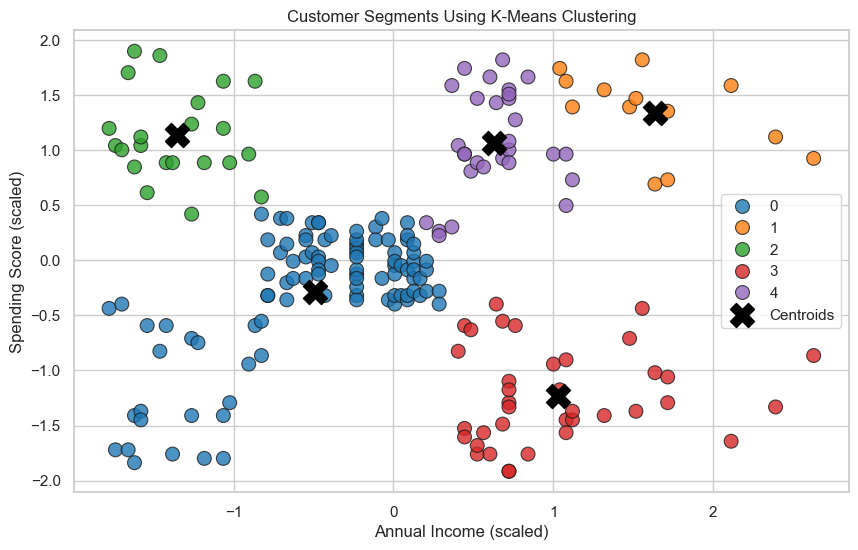


Clustered customer data saved as 'clustered_customers.csv'


In [1]:
# -----------------------
# IMPORT LIBRARIES
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set style for better visuals
sns.set(style='whitegrid')

# -----------------------
# LOAD DATA
# -----------------------
df = pd.read_csv('Mall_Customers.csv')
print("Initial Data:")
print(df.head())

# -----------------------
# BASIC CLEANING
# -----------------------
print("\nChecking for nulls:\n", df.isnull().sum())
df = df.dropna()  # just in case
print("Shape after cleaning:", df.shape)

# -----------------------
# OPTIONAL OUTLIER REMOVAL (based on IQR)
# -----------------------
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_cleaned = remove_outliers_iqr(df.copy(), ['Annual Income (k$)', 'Spending Score (1-100)'])

# -----------------------
# SELECT FEATURES
# -----------------------
features = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# -----------------------
# FEATURE SCALING
# -----------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# -----------------------
# FIND OPTIMAL K USING ELBOW METHOD
# -----------------------
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

# -----------------------
# CHOOSE OPTIMAL K BASED ON ELBOW
# -----------------------
optimal_k = 5  # Based on elbow, or replace with silhouette score logic

# -----------------------
# APPLY K-MEANS
# -----------------------
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# -----------------------
# ADD CLUSTER RESULTS TO DATA
# -----------------------
df_cleaned['Cluster'] = clusters

# -----------------------
# EVALUATE CLUSTERS
# -----------------------
score = silhouette_score(scaled_features, clusters)
print(f"\nSilhouette Score for k={optimal_k}: {score:.4f}")

# -----------------------
# VISUALIZE CLUSTERS
# -----------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=clusters, palette='tab10', s=100, edgecolor='k', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1], c='black', s=300, marker='X', label='Centroids'
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments Using K-Means Clustering")
plt.legend()
plt.show()

# -----------------------
# EXPORT RESULTS
# -----------------------
df_cleaned.to_csv("clustered_customers.csv", index=False)
print("\nClustered customer data saved as 'clustered_customers.csv'")
